In [1]:
## last edited: 5/27/22
## Status: Fixed path names to match new directory structure. 
##         Makes pretty simple cartopy plots of flight paths

import os
import datetime 
import warnings

import numpy as np
import xarray as xr

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import shapely.geometry as sgeom
import cartopy.crs as ccrs
import cartopy.feature as cfeature
 
os.chdir(  "/Users/etmu9498/research/code/scripts")
import make_plots

In [2]:
# testing scripts for loading data
sonde_path_0926 = "/Users/etmu9498/research/data/dropsondes/noaa-data/20210926H1_NETCDF"
sonde_path_0927 = "/Users/etmu9498/research/data/dropsondes/noaa-data/20210927H1_NETCDF"
sonde_path_0929 = "/Users/etmu9498/research/data/dropsondes/noaa-data/20210929H2_NETCDF"
sonde_path_0930 = "/Users/etmu9498/research/data/dropsondes/noaa-data/20210930H1_NETCDF"
crl_path = "/Users/etmu9498/research/data/CRL_data/2021"
tdr_path = "/Users/etmu9498/research/data/tdr/sam/nc-files"

tdr_list = make_plots.load_tdr( tdr_path)
crl_list = make_plots.load_crl( crl_path)
sondes_0926 = make_plots.load_sondes(sonde_path_0926)
sondes_0927 = make_plots.load_sondes(sonde_path_0927)
sondes_0929 = make_plots.load_sondes(sonde_path_0929)
sondes_0930 = make_plots.load_sondes(sonde_path_0930)

tdr data files:
0) 210926H1_2237_vert_inbound.nc
1) 210926H1_2237_vert_outbound.nc
2) 210926H1_2350_vert_inbound.nc
3) 210926H1_2350_vert_outbound.nc
4) 210926H1_2457_vert_inbound.nc
5) 210926H1_2457_vert_outbound.nc
6) 210927H1_2205_vert_inbound.nc
7) 210927H1_2205_vert_outbound.nc
8) 210927H1_2320_vert_inbound.nc
9) 210927H1_2320_vert_outbound.nc
10) 210927H1_2433_vert_inbound.nc
11) 210927H1_2433_vert_outbound.nc
12) 210929H2_2137_vert_inbound.nc
13) 210929H2_2137_vert_outbound.nc
14) 210929H2_2249_vert_inbound.nc
15) 210929H2_2249_vert_outbound.nc
16) 210929H2_2402_vert_inbound.nc
17) 210929H2_2402_vert_outbound.nc

crl data files:
0) P3_20210811H1_200000-224759.cdf
1) P3_20210812H1_095513-125927.cdf
2) P3_20210812H2_212248-235510.cdf
3) P3_20210813H1_091801-113558.cdf
4) P3_20210816H1_085245-123459.cdf
5) P3_20210816H1_090000-102359.cdf
6) P3_20210817H1_094204-132058.cdf
7) P3_20210818H1_211425-244159.cdf
8) P3_20210819H1_213003-244159.cdf
9) P3_20210820H1_212402-245958.cdf
10) P3

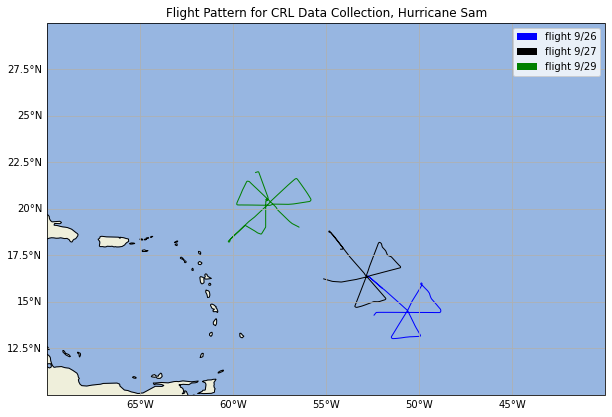

In [3]:
# crl flight path figure Sam

def main():
    fig = plt.figure( figsize=(10, 10))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

    # zoomed out   
    # ax.set_extent([-80, -40, 10, 40], crs=ccrs.PlateCarree())
    # zoomed in
    ax.set_extent([-70, -40, 10, 30], crs=ccrs.PlateCarree())

    gl = ax.gridlines( draw_labels=True) #, color="k")
    gl.top_labels = False
    gl.right_labels = False

    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE)

    colors = ['b', 'k', 'g']
    # plot all three flight paths
    for i in range(3):    
        os.chdir( crl_path)
        crl_data = xr.open_dataset( crl_list[i+16])
        lat = crl_data.Lat
        lon = crl_data.Lon    
        track = sgeom.LineString(zip(lon, lat))
        ax.add_geometries([track], ccrs.PlateCarree(),
                          facecolor='none', edgecolor=colors[i])                          

    sam26 = mpatches.Rectangle((0, 0), 1, 1, facecolor="b")
    sam27 = mpatches.Rectangle((0, 0), 1, 1, facecolor="k")
    sam29 = mpatches.Rectangle((0, 0), 1, 1, facecolor="g") 
    labels = ['flight 9/26', 'flight 9/27', 'flight 9/29']
    ax.legend([sam26, sam27, sam29], labels)
    
    ax.set_title( "Flight Pattern for CRL Data Collection, Hurricane Sam")
    ax.set_xlabel( "Longitude (Degrees)")
    ax.set_ylabel( "Latitude (Degrees)")
    plt.show()
    

    
if __name__ == '__main__':
    main()

In [4]:
# testing things

os.chdir( crl_path)
crl_data = xr.open_dataset( crl_list[16])

lat = crl_data.Lat
lon = crl_data.Lon

# print( np.nanmax( lat))
# print( np.nanmin( lat))

# print( np.nanmax( lon))
# print( np.nanmin( lon))

os.chdir( sonde_path_0926)
sonde_data_0926 = xr.open_dataset( sondes_0926[10])

# sonde_data_0926

os.chdir( tdr_path)
tdr_inbound = xr.open_dataset( tdr_list[0])
tdr_outbound = xr.open_dataset( tdr_list[1])

print( len( tdr_inbound.latitude))
print( len( tdr_inbound.longitude))

print( len( tdr_outbound.latitude))
print( len( tdr_outbound.longitude))

167
167
167
167


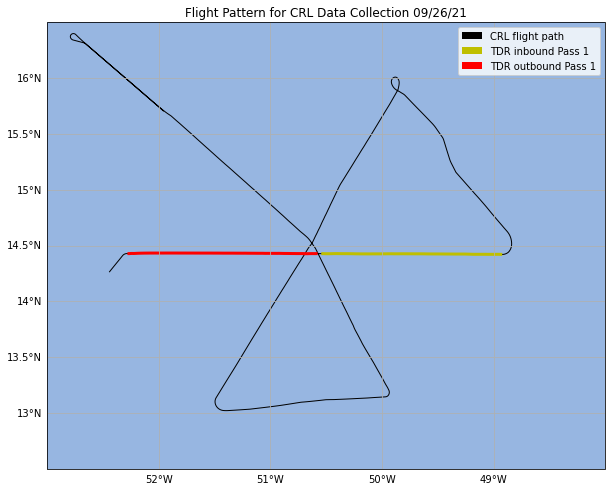

In [5]:
# CRL and dropsonde paths for one day 09/26

def main():
    fig = plt.figure( figsize=(10, 10))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
    
    # zoomed out
    # ax.set_extent([-70, -40, 10, 30], crs=ccrs.PlateCarree())
    # zoomed in on eye
    ax.set_extent([-53, -48, 12.5, 16.5], crs=ccrs.PlateCarree())
    
    gl = ax.gridlines( draw_labels=True) #, color="k")
    gl.top_labels = False
    gl.right_labels = False

    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE)
    
    # crl path line
    os.chdir( crl_path)
    crl_data = xr.open_dataset( crl_list[16])
    lat = crl_data.Lat
    lon = crl_data.Lon

    track = sgeom.LineString(zip(lon, lat))
    ax.add_geometries([track], ccrs.PlateCarree(),
                      facecolor='none', edgecolor='k', zorder=0)

    # tdr path line
    os.chdir( tdr_path)
    tdr_inbound = xr.open_dataset( tdr_list[0])
    tdr_outbound = xr.open_dataset( tdr_list[1])
    
    track2 = sgeom.LineString(zip( tdr_inbound.longitude, tdr_inbound.latitude))
    ax.add_geometries([track2], ccrs.PlateCarree(),
                      facecolor='none', edgecolor='r', zorder=0, linewidth=3)

    track3 = sgeom.LineString(zip( tdr_outbound.longitude, tdr_outbound.latitude))
    ax.add_geometries([track3], ccrs.PlateCarree(),
                      facecolor='none', edgecolor='y', zorder=0, linewidth=3)
    
#     os.chdir( sonde_path_0926)
#     for i in range( len( sondes_0926)):
#         sonde = xr.open_dataset( sondes_0926[ i])
#         ax.scatter( sonde.reference_lon, sonde.reference_lat, s=10, c='r', edgecolor='r', zorder=1)
    
#     os.chdir( sonde_path_0927)
#     for i in range( len( sondes_0927)):
#         sonde = xr.open_dataset( sondes_0927[ i])
#         ax.scatter( sonde.reference_lon, sonde.reference_lat, s=10, c='r', edgecolor='r', zorder=1)
    
    line = mpatches.Rectangle((0, 0), 1, 1, facecolor="k")
    line3 = mpatches.Rectangle((0, 0), 1, 1, facecolor="r")
    line2 = mpatches.Rectangle((0, 0), 1, 1, facecolor="y")
    dots = mpatches.Circle((10, 5), radius=5, facecolor="r")
    labels = ['CRL flight path', 'TDR inbound Pass 1', 'TDR outbound Pass 1' ]# , 'Dropsonde points']
    ax.legend([line, line2, line3], labels) # dots], labels)
    
    ax.set_title( "Flight Pattern for CRL Data Collection 09/26/21")
    ax.set_xlabel( "Longitude (Degrees)")
    ax.set_ylabel( "Latitude (Degrees)")
    plt.show()
    

    
if __name__ == '__main__':
    main()

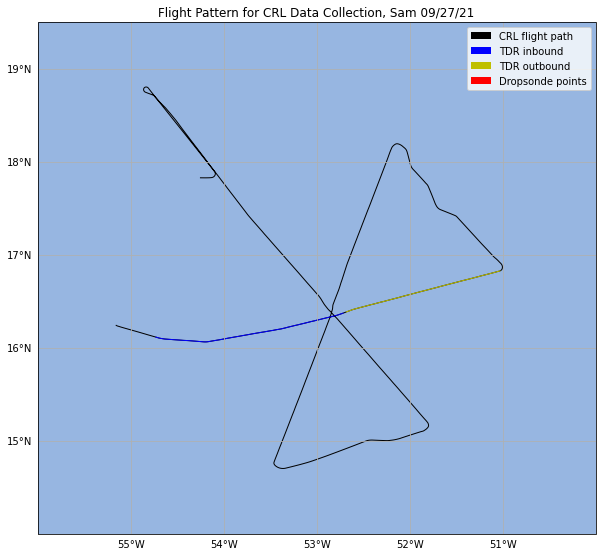

In [6]:
# CRL and dropsonde paths for one day 09/27

def main():
    fig = plt.figure( figsize=(10, 10))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
    
    # zoomed out
    # ax.set_extent([-70, -40, 10, 30], crs=ccrs.PlateCarree())
    # zoomed in on eye
    ax.set_extent([-56, -50, 14, 19.5], crs=ccrs.PlateCarree())
    
    gl = ax.gridlines( draw_labels=True) #, color="k")
    gl.top_labels = False
    gl.right_labels = False

    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE)

    # crl data
    os.chdir( crl_path)
    crl_data = xr.open_dataset( crl_list[17])
    lat = crl_data.Lat
    lon = crl_data.Lon

    track = sgeom.LineString(zip(lon, lat))
    ax.add_geometries([track], ccrs.PlateCarree(),
                      facecolor='none', edgecolor='k', zorder=0)
    
    # tdr data
    os.chdir( tdr_path)
    tdr_inbound = xr.open_dataset( tdr_list[6])
    tdr_outbound = xr.open_dataset( tdr_list[7])
    
    track2 = sgeom.LineString(zip( tdr_inbound.longitude, tdr_inbound.latitude))
    ax.add_geometries([track2], ccrs.PlateCarree(),
                      facecolor='none', edgecolor='b', zorder=0)

    track3 = sgeom.LineString(zip( tdr_outbound.longitude, tdr_outbound.latitude))
    ax.add_geometries([track3], ccrs.PlateCarree(),
                      facecolor='none', edgecolor='y', zorder=0)
    
    line = mpatches.Rectangle((0, 0), 1, 1, facecolor="k")
    line2 = mpatches.Rectangle((0, 0), 1, 1, facecolor="b")
    line3 = mpatches.Rectangle((0, 0), 1, 1, facecolor="y")
    dots = mpatches.Circle((10, 5), radius=5, facecolor="r")
    labels = ['CRL flight path', 'TDR inbound', 'TDR outbound', 'Dropsonde points']
    ax.legend([line, line2, line3, dots], labels)
    
    ax.set_title( "Flight Pattern for CRL Data Collection, Sam 09/27/21")
    ax.set_xlabel( "Longitude (Degrees)")
    ax.set_ylabel( "Latitude (Degrees)")
    plt.show()
    

    
if __name__ == '__main__':
    main()

<xarray.DataArray 'reference_lon' (obs: 1)>
array([-58.25], dtype=float32)
Dimensions without coordinates: obs
Attributes:
    long_name:    reference longitude
    units:        degrees
    valid_range:  [-180.  180.]
<xarray.DataArray 'reference_lon' (obs: 1)>
array([-58.8], dtype=float32)
Dimensions without coordinates: obs
Attributes:
    long_name:    reference longitude
    units:        degrees
    valid_range:  [-180.  180.]
<xarray.DataArray 'reference_lon' (obs: 1)>
array([nan], dtype=float32)
Dimensions without coordinates: obs
Attributes:
    long_name:    reference longitude
    units:        degrees
    valid_range:  [-180.  180.]
<xarray.DataArray 'reference_lon' (obs: 1)>
array([-59.38], dtype=float32)
Dimensions without coordinates: obs
Attributes:
    long_name:    reference longitude
    units:        degrees
    valid_range:  [-180.  180.]
<xarray.DataArray 'reference_lon' (obs: 1)>
array([nan], dtype=float32)
Dimensions without coordinates: obs
Attributes:
    long

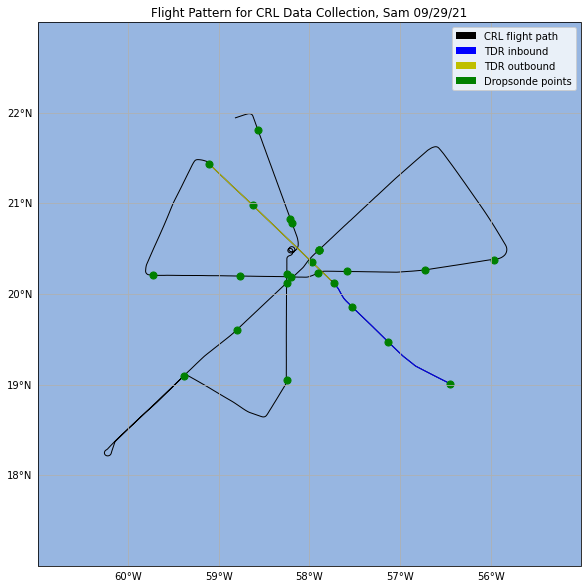

In [8]:
def main():
    fig = plt.figure( figsize=(10, 10))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
    
    # zoomed out
    # ax.set_extent([-70, -40, 10, 30], crs=ccrs.PlateCarree())
    # zoomed in on eye
    ax.set_extent([-61, -55, 23, 17], crs=ccrs.PlateCarree())
    
    gl = ax.gridlines( draw_labels=True) #, color="k")
    gl.top_labels = False
    gl.right_labels = False

    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE)
    
    os.chdir( crl_path)
    crl_data = xr.open_dataset( crl_list[18])
    lat = crl_data.Lat
    lon = crl_data.Lon

    track = sgeom.LineString(zip(lon, lat))
    ax.add_geometries([track], ccrs.PlateCarree(),
                      facecolor='none', edgecolor='k', zorder=0)

    os.chdir( sonde_path_0929)
    for i in range( len( sondes_0929)):
        sonde = xr.open_dataset( sondes_0929[ i])
        ax.scatter( sonde.reference_lon, sonde.reference_lat, s=50, c='g', edgecolor='g', zorder=1)

    os.chdir( sonde_path_0930)
    for i in range( len( sondes_0930)):
        sonde = xr.open_dataset( sondes_0930[ i])
        print(sonde.reference_lon)
        ax.scatter( sonde.reference_lon, sonde.reference_lat, s=50, c='g', edgecolor='g', zorder=1)

    # tdr data
    os.chdir( tdr_path)
    tdr_inbound = xr.open_dataset( tdr_list[12])
    tdr_outbound = xr.open_dataset( tdr_list[13])
    
    track2 = sgeom.LineString(zip( tdr_inbound.longitude, tdr_inbound.latitude))
    ax.add_geometries([track2], ccrs.PlateCarree(),
                      facecolor='none', edgecolor='b', zorder=0)

    track3 = sgeom.LineString(zip( tdr_outbound.longitude, tdr_outbound.latitude))
    ax.add_geometries([track3], ccrs.PlateCarree(),
                      facecolor='none', edgecolor='y', zorder=0)
    
    line = mpatches.Rectangle((0, 0), 1, 1, facecolor="k")
    line2 = mpatches.Rectangle((0, 0), 1, 1, facecolor="b")
    line3 = mpatches.Rectangle((0, 0), 1, 1, facecolor="y")
    dots = mpatches.Circle((10, 5), radius=5, facecolor="g")
    labels = ['CRL flight path', 'TDR inbound', 'TDR outbound', 'Dropsonde points']
    ax.legend([line, line2, line3, dots], labels)
    
    ax.set_title( "Flight Pattern for CRL Data Collection, Sam 09/29/21")
    ax.set_xlabel( "Longitude (Degrees)")
    ax.set_ylabel( "Latitude (Degrees)")
    plt.show()
    

    
if __name__ == '__main__':
    main()